In [9]:
''' Needed libraries '''

import numpy as np # For matrix operations and numerical processing
import matplotlib.pyplot as plt # For plotting
import os, sys # For filepaths
from sklearn.decomposition import PCA

In [10]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
libraries_path = os.path.join(home_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

In [11]:
''' Load the dataset '''

dataset = np.load(os.path.join(datasets_path, 'fashion_train.npy'))
print("Dataset shape: ", dataset.shape)

Dataset shape:  (10000, 785)


In [12]:
''' Divide the dataset into images and labels  '''

images = dataset[:, :-1]  # Define the images as all columns except the last one
labels = dataset[:, -1] # Define the labels as the last column

In [13]:
''' Dictionary for the labels '''

labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

In [15]:
pca = PCA(n_components= 2)
images_transformed = pca.fit_transform(images)
pca.explained_variance_ratio_

array([0.32309944, 0.16269657])

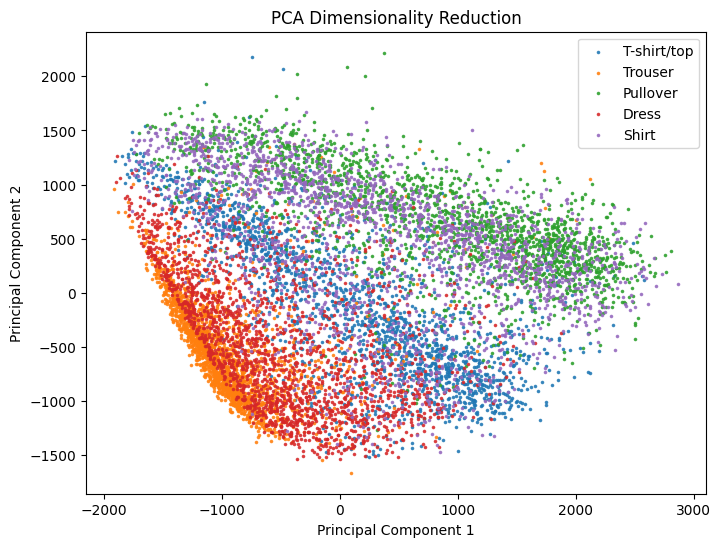

In [16]:
plt.figure(figsize=(8, 6))
for label_value in np.unique(labels):
    indices = np.where(labels == label_value)
    plt.scatter(images_transformed[indices, 0], images_transformed[indices, 1], label=labels_dict[label_value], s=10, alpha=0.8, marker='.', linewidths=1)

plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()